In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
dataset = pd.read_csv("california_housing_train.csv")
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [94]:
stats = dataset.describe()
stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


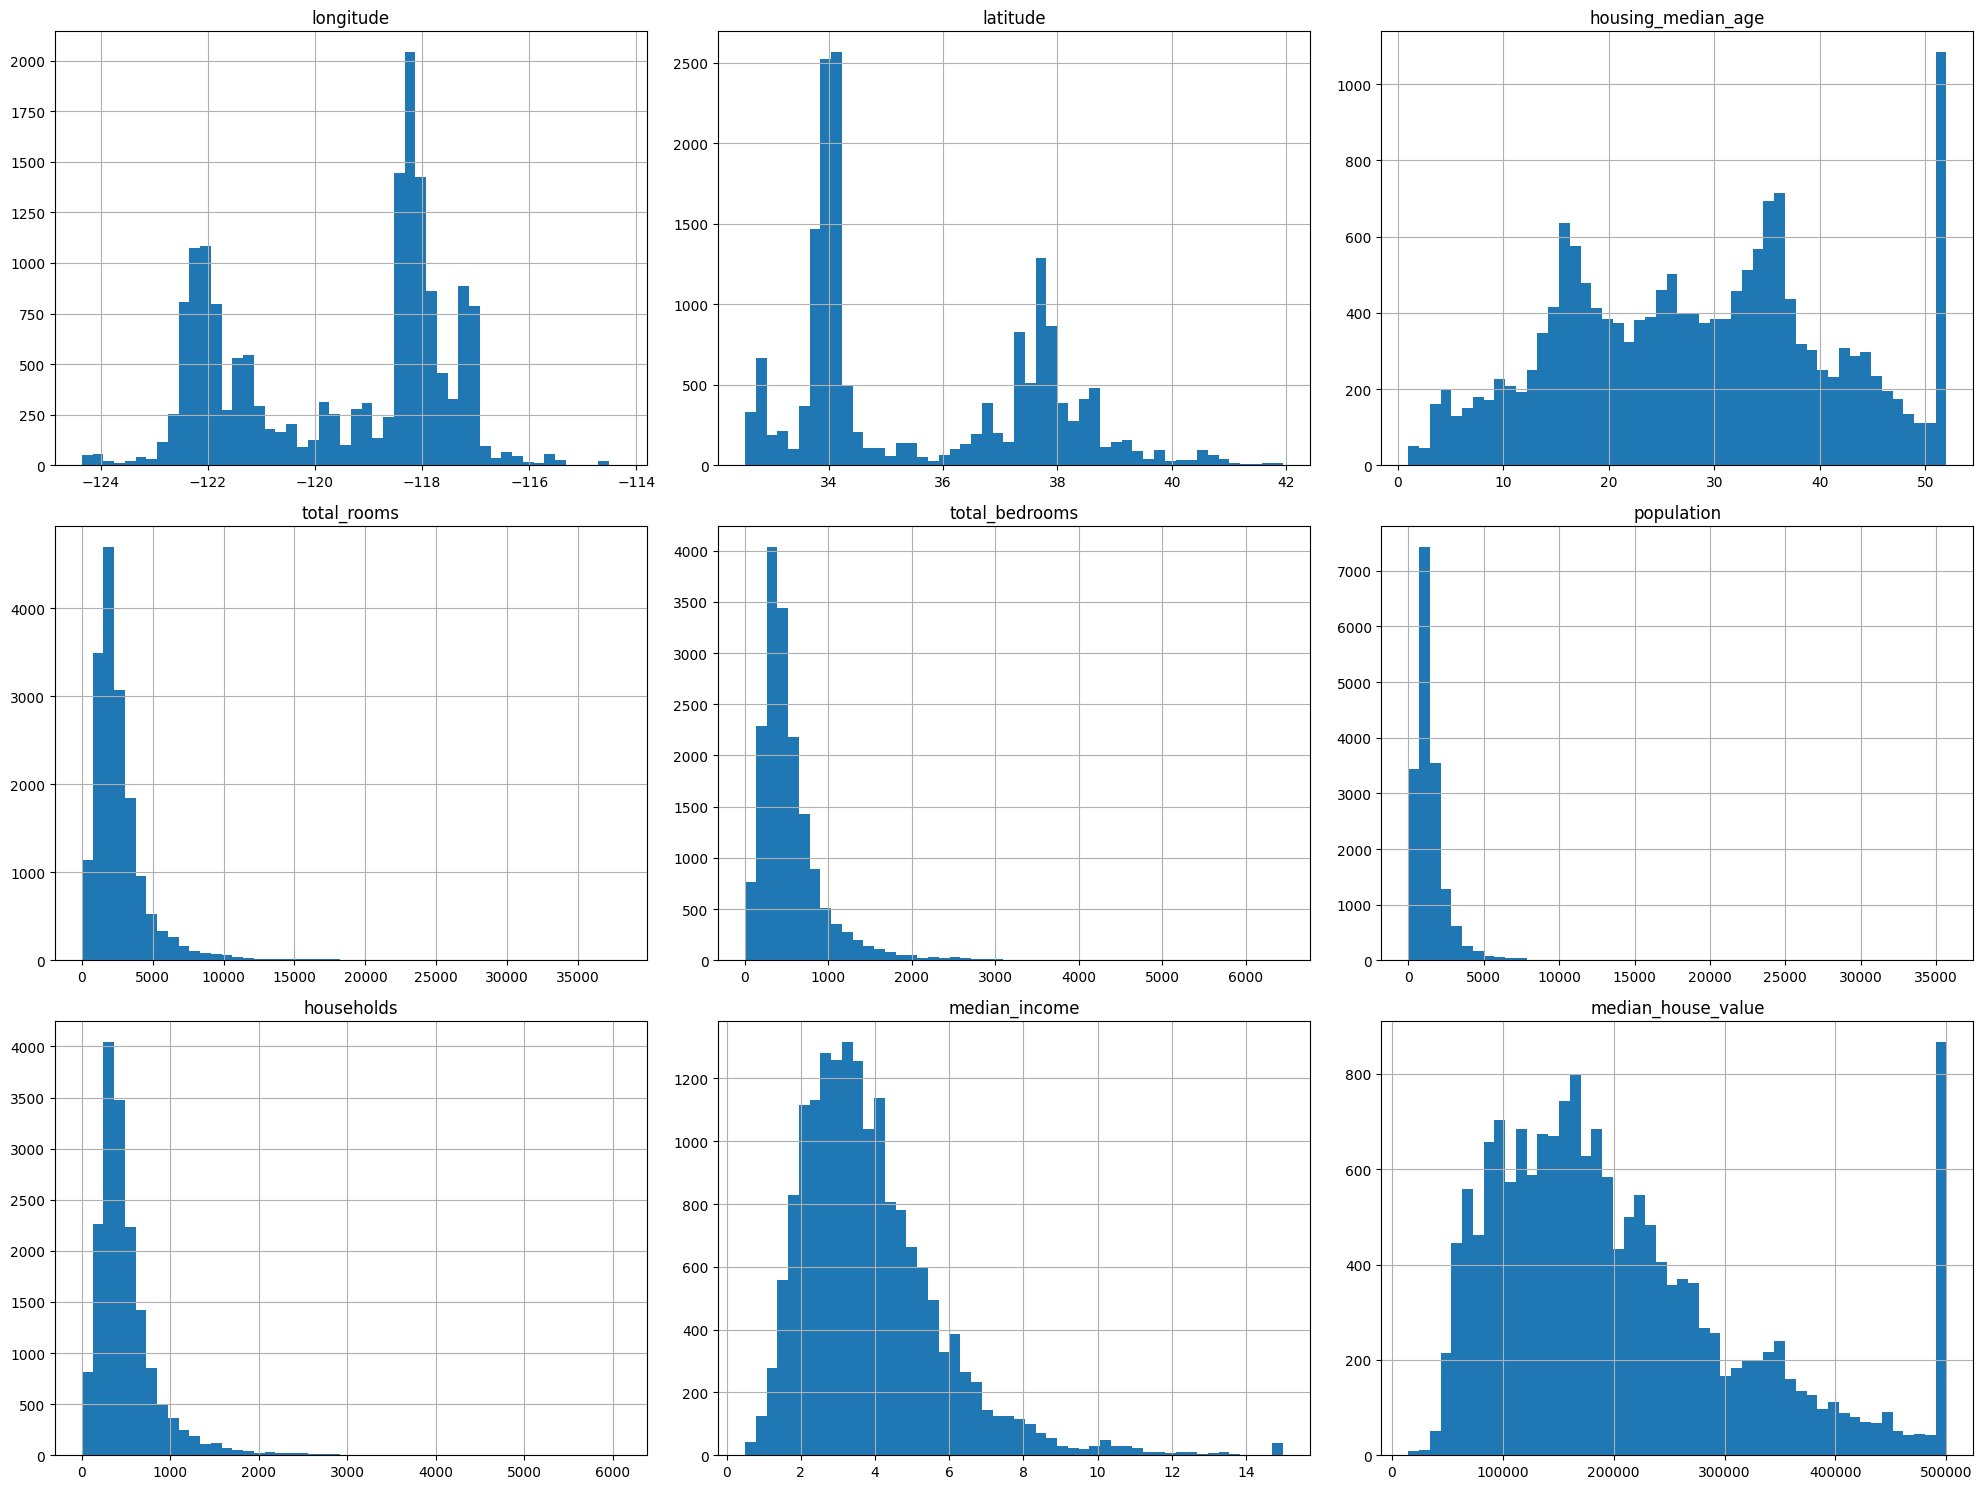

In [95]:
# Визуализация распределения каждого признака через гистограммы
dataset.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()


In [96]:
# Тепловая карта корреляций
# plt.figure(figsize=(10, 8))
# sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
# plt.title('Корреляция между признаками')
# plt.show()


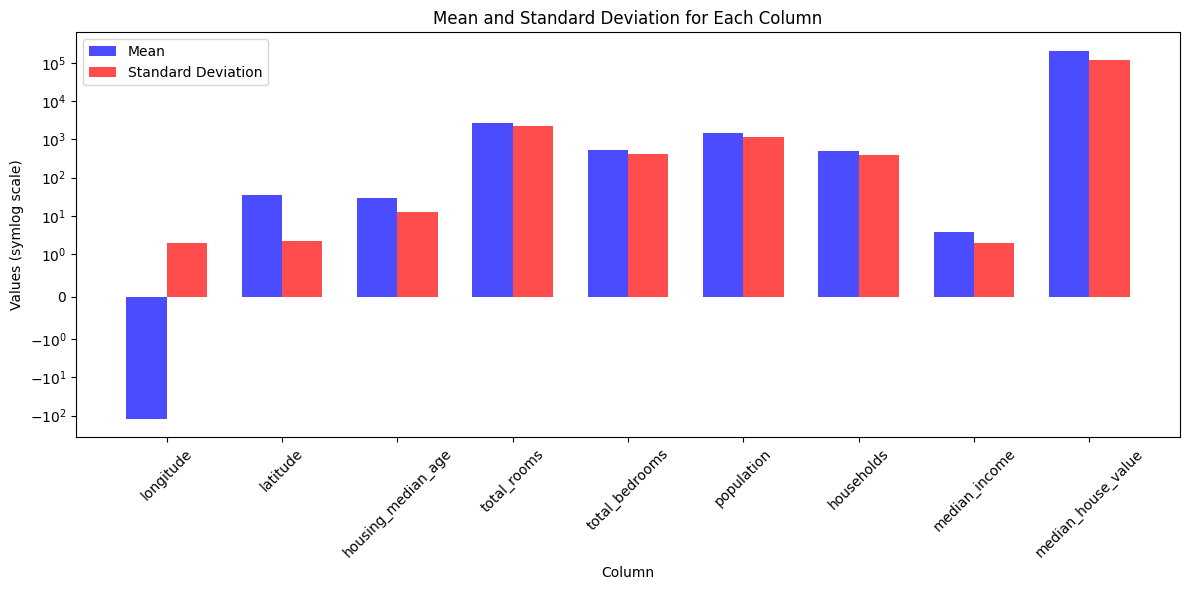

In [97]:
# Среднее значение и стандартное отклонение
mean_values = stats.loc['mean']
std_values = stats.loc['std']

# Визуализация среднего значения и стандартного отклонения с симметричной логарифмической шкалой
plt.figure(figsize=(12, 6))
index = np.arange(len(mean_values))
bar_width = 0.35

plt.bar(index, mean_values, bar_width, label='Mean', alpha=0.7, color='b')
plt.bar(index + bar_width, std_values, bar_width, label='Standard Deviation', alpha=0.7, color='r')

# Симметричная логарифмическая шкала для оси Y
plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values (symlog scale)')
plt.title('Mean and Standard Deviation for Each Column')
plt.xticks(index + bar_width / 2, mean_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print("Average values for each column:")
print(mean_values)
print("The standard deviation for each column:")
print(std_values)

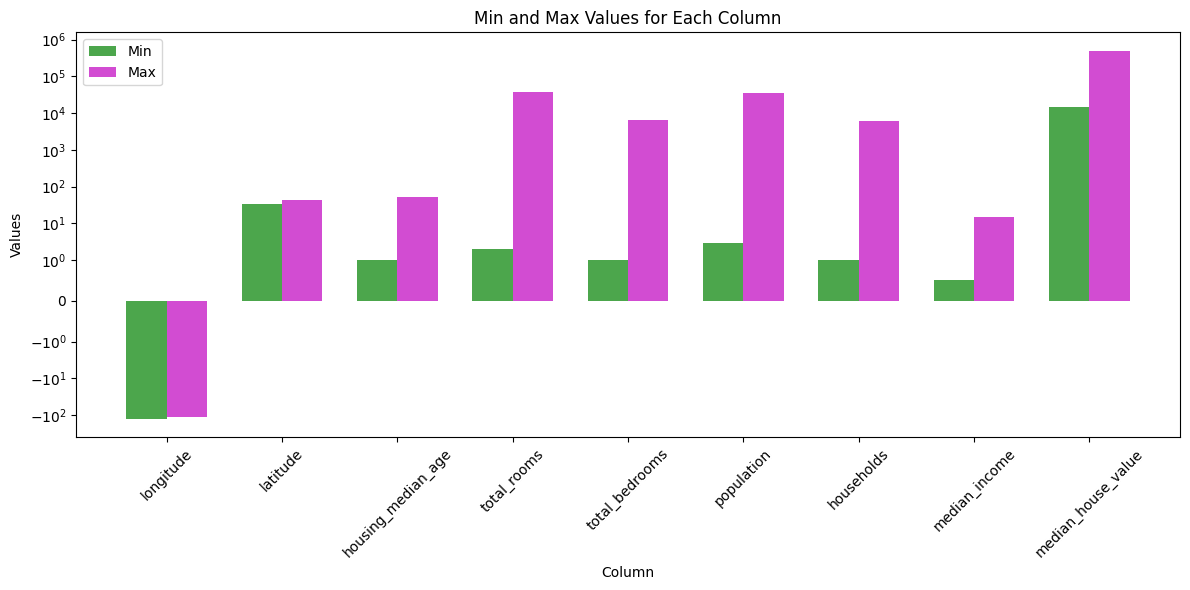

In [98]:
# Минимум и максимум
min_values = stats.loc['min']
max_values = stats.loc['max']

# Визуализация минимума и максимума
plt.figure(figsize=(12, 6))
plt.bar(index, min_values, bar_width, label='Min', alpha=0.7, color='g')
plt.bar(index + bar_width, max_values, bar_width, label='Max', alpha=0.7, color='m')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Column')
plt.ylabel('Values')
plt.title('Min and Max Values for Each Column')
plt.xticks(index + bar_width / 2, min_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [99]:
print("Minimum values for each column:")
print(min_values)
print("\nMaximum values for each column:")
print(max_values)

Minimum values for each column:
longitude              -124.3500
latitude                 32.5400
housing_median_age        1.0000
total_rooms               2.0000
total_bedrooms            1.0000
population                3.0000
households                1.0000
median_income             0.4999
median_house_value    14999.0000
Name: min, dtype: float64

Maximum values for each column:
longitude               -114.3100
latitude                  41.9500
housing_median_age        52.0000
total_rooms            37937.0000
total_bedrooms          6445.0000
population             35682.0000
households              6082.0000
median_income             15.0001
median_house_value    500001.0000
Name: max, dtype: float64


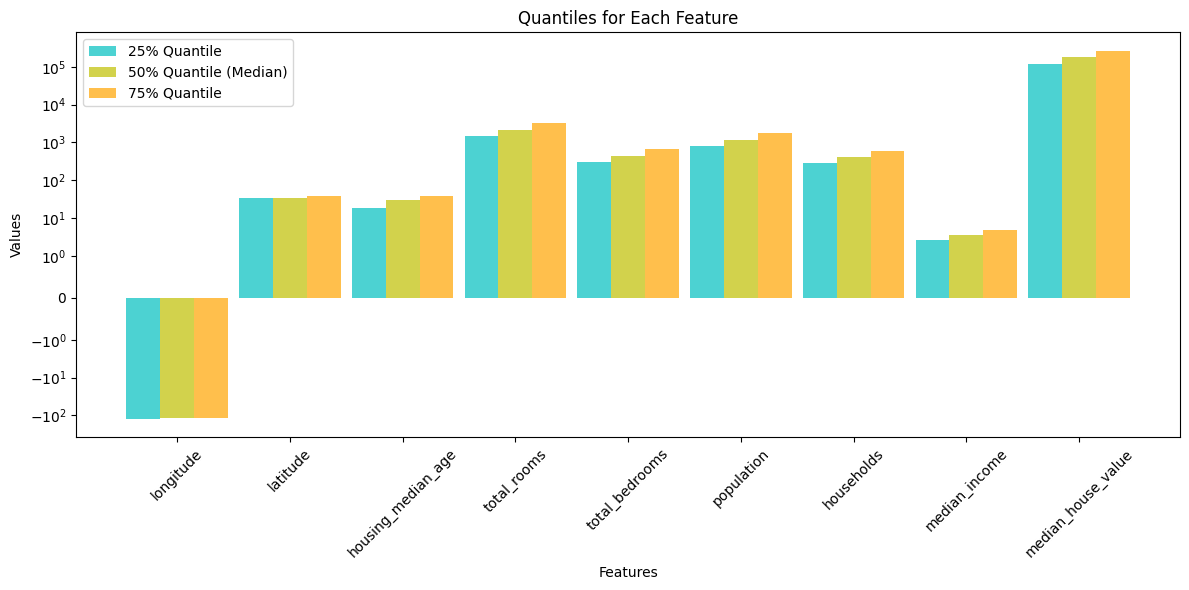

In [100]:
# Квантили 25%, 50% (медиана), 75%
q25_values = stats.loc['25%']
q50_values = stats.loc['50%']
q75_values = stats.loc['75%']

index = np.arange(len(q25_values))  # Делаем индекс на основе количества квантилей

bar_width = 0.3  # Ширина бара

# Визуализация квартилей
plt.figure(figsize=(12, 6))
plt.bar(index, q25_values, bar_width, label='25% Quantile', alpha=0.7, color='c')
plt.bar(index + bar_width, q50_values, bar_width, label='50% Quantile (Median)', alpha=0.7, color='y')
plt.bar(index + 2 * bar_width, q75_values, bar_width, label='75% Quantile', alpha=0.7, color='orange')

plt.yscale('symlog', linthresh=1)  # Логарифмическая шкала с линейным участком при малых значениях
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Quantiles for Each Feature')
plt.xticks(index + bar_width, q25_values.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


In [101]:
quantiles = dataset.quantile([0.25, 0.50, 0.75])
print("Квантили для каждого столбца (25%, 50%, 75%):")
print(quantiles)

Квантили для каждого столбца (25%, 50%, 75%):
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0.25    -121.79     33.93                18.0      1462.00          297.00   
0.50    -118.49     34.25                29.0      2127.00          434.00   
0.75    -118.00     37.72                37.0      3151.25          648.25   

      population  households  median_income  median_house_value  
0.25       790.0      282.00       2.566375            119400.0  
0.50      1167.0      409.00       3.544600            180400.0  
0.75      1721.0      605.25       4.767000            265000.0  


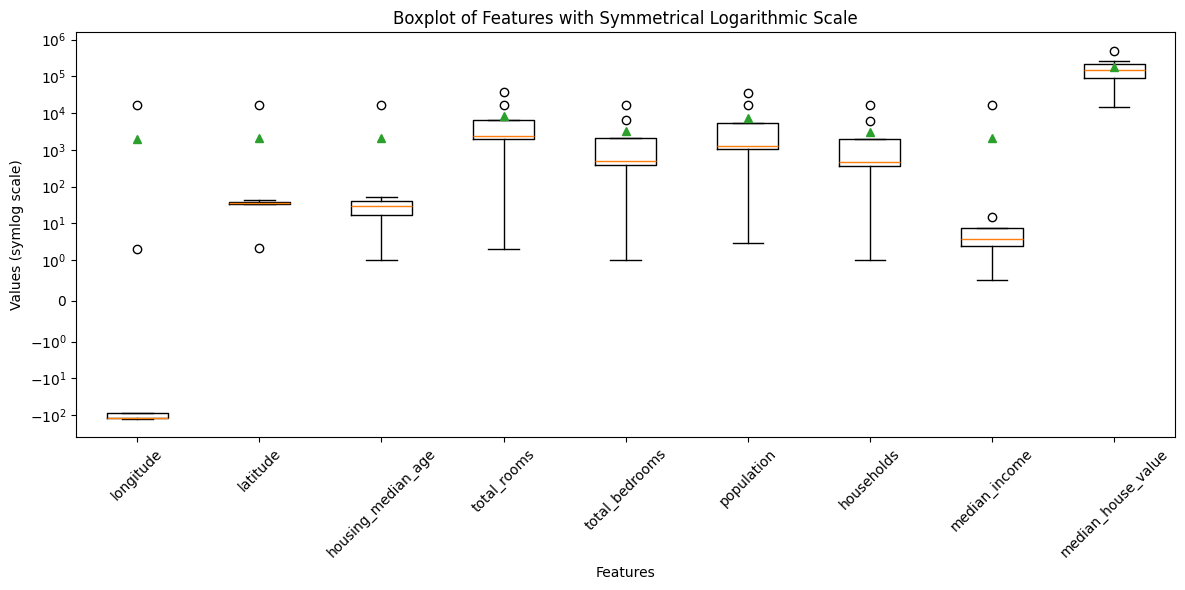

In [103]:
plt.figure(figsize=(12, 6))
plt.boxplot([stats[col] for col in stats.columns], tick_labels=stats.columns, showmeans=True)

plt.yscale('symlog', linthresh=1)  # Симметричная логарифмическая шкала с линейным порогом в 1
plt.xlabel('Features')
plt.ylabel('Values (symlog scale)')
plt.title('Boxplot of Features with Symmetrical Logarithmic Scale')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Обработка отсутствующих значений

In [105]:
# Проверка отсутствующих значений 
dataset.isnull().sum()  
# Если есть отсутствующие значения, можно заполнить их медианными значениями 
dataset.fillna(dataset.median(), inplace=True)


17000

Нормализация данных

In [ ]:
# Нормализация данных (стандартизация) 
numeric_features = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_features] = (dataset[numeric_features] - dataset[numeric_features].mean()) / dataset[numeric_features].std()

Разделение данных на обучающую и тестовую выборки